In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
import string
import common as cm

In [2]:
ciphertext1 = "nrstymjwjytgjujwkjhynrmjwjytgjwjfqqfidlflf"

In [3]:
englishAlphabet = list(string.ascii_lowercase)

In [4]:
bookEnglish = open("./statics/PictureOfDorianGray.txt", "r", encoding='utf8')
counter = 0 
sampleNaturalLanguage = ""

for line in bookEnglish:
    sampleNaturalLanguage += cm.lclear(line.strip())
    counter += 1
    if counter > 5000: 
        break

In [5]:
frequencyTableNaturalLanguage = cm.getFrequencyTable(sampleNaturalLanguage, englishAlphabet)
frequencyTableChipher = cm.getFrequencyTable(ciphertext1, englishAlphabet)


cipherTextFrequenciesSorted = list(frequencyTableChipher.items())
cipherTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
naturalLanguageFrequenciesSorted = list(frequencyTableNaturalLanguage.items())
naturalLanguageFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)

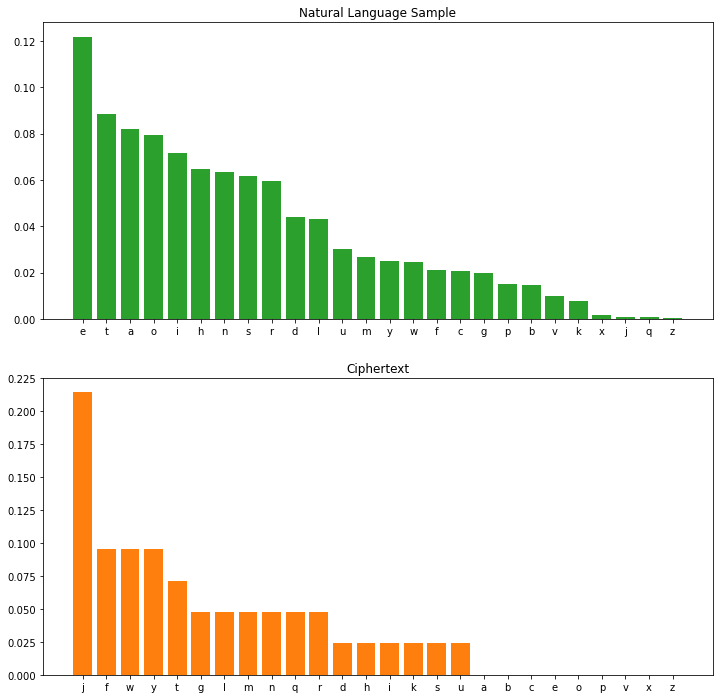

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

ax1.bar(
    list(map(lambda x: x[0] ,naturalLanguageFrequenciesSorted)),
    list(map(lambda x: x[1] ,naturalLanguageFrequenciesSorted)),
    color="tab:green"
)
ax1.set(title="Natural Language Sample")
ax2.bar(
    list(map(lambda x: x[0] ,cipherTextFrequenciesSorted)),
    list(map(lambda x: x[1] ,cipherTextFrequenciesSorted)),
    color="tab:orange"
)
ax2.set(title="Ciphertext")
plt.show()

In [7]:
possibleDecryption = {}
for i in range(len(cipherTextFrequenciesSorted)):
    possibleDecryption[englishAlphabet[i]] = englishAlphabet[(i - 5) % 26]
possibleDecryption[" "] = " "
    
print(possibleDecryption)
print(naturalLanguageFrequenciesSorted)

{'a': 'v', 'b': 'w', 'c': 'x', 'd': 'y', 'e': 'z', 'f': 'a', 'g': 'b', 'h': 'c', 'i': 'd', 'j': 'e', 'k': 'f', 'l': 'g', 'm': 'h', 'n': 'i', 'o': 'j', 'p': 'k', 'q': 'l', 'r': 'm', 's': 'n', 't': 'o', 'u': 'p', 'v': 'q', 'w': 'r', 'x': 's', 'y': 't', 'z': 'u', ' ': ' '}
[('e', 0.12191759136797921), ('t', 0.08848536222929189), ('a', 0.08207670978251434), ('o', 0.07932941494875631), ('i', 0.07170541646027911), ('h', 0.06466866500875763), ('n', 0.06349417093484622), ('s', 0.061727323328005554), ('r', 0.05953663655536207), ('d', 0.043859693916631345), ('l', 0.04322648841591389), ('u', 0.030286627618994123), ('m', 0.026880594804650996), ('y', 0.02517502514949267), ('w', 0.024643949568245765), ('f', 0.02125834273779675), ('c', 0.020553646293449898), ('g', 0.01996129276052066), ('p', 0.014951820210489764), ('b', 0.014609684980263393), ('v', 0.009860643724882424), ('k', 0.007838471319365365), ('x', 0.001562587767899545), ('j', 0.0009906602188644175), ('q', 0.0009702342349703057), ('z', 0.00042

In [8]:
decryptionAttempt = ""
for ch in ciphertext1:
    decryptionAttempt= decryptionAttempt + possibleDecryption[ch]
    
print(f"Cipher text : {ciphertext1}")
print(f"Decrypted message : {decryptionAttempt}\n")

Cipher text : nrstymjwjytgjujwkjhynrmjwjytgjwjfqqfidlflf
Decrypted message : imnotheretobeperfectimheretoberealladygaga



*******


In [9]:
ciphertext2 = "bljjubbcbzteqczfdqfcdlvucbzteqfefdcecbeyujtlvfwuetjtzeczlueyfejtlzebsczbetzjylvjycdd"

In [10]:
naturalLanguageAnalysis = cm.KGramAnalysis(textToAnalize=sampleNaturalLanguage, k=4)
fitnessTable, floorFitness = naturalLanguageAnalysis.calculateLogarithmicFitnessTable()

In [11]:
print(floorFitness)

-7.291870352977305


In [12]:
naturalLanguageAnalysis.fitnessMeasure('A mad dog is nothing more but a wicked creature.', fitnessTable, floorFitness)

-155.32905885823183

In [13]:
naturalLanguageAnalysis.fitnessMeasure(ciphertext2, fitnessTable, floorFitness)

-588.1643773364416

In [14]:
def encryptMessage(message: str, publicKey: list[int], alphabet: list[str]) -> str:
    message_lowercase = message.lower()
    ciphertext = ""

    for i in message_lowercase:
        if(i == " "):
            ciphertext = ciphertext + " "
        elif (i not in alphabet):
            continue
        else:
            nextChar = alphabet[publicKey[alphabet.index(i)]]
            ciphertext = ciphertext + nextChar

    return ciphertext

def decryptMessage(ciphertext: str, privateKey: list[int], alphabet: list[str]) -> str:
    return encryptMessage(ciphertext, privateKey, alphabet)

In [15]:
def crackSubstitutionCipher(cipher: str, kGramTools: cm.KGramAnalysis, alphabet: list[str], iterations: int = 100):
    fitnessTable, floorFitness = kGramTools.calculateLogarithmicFitnessTable()
    ciphertext = cm.lclear(cipher)
    maxkey = list(range(0, len(alphabet)))
    maxscore = -99e9
    parentScore,parentKey = maxscore, maxkey
    
    for i in range(1, iterations):
        random.shuffle(parentKey)
        possiblePlaintext = decryptMessage(ciphertext, parentKey, alphabet)
        parentScore = kGramTools.fitnessMeasure(possiblePlaintext, fitnessTable, floorFitness)
        
        count = 0
        while count < 1000:
            a = random.randint(0,25)
            b = random.randint(0,25)
            childKey = parentKey[:]
            childKey[a],childKey[b] = childKey[b],childKey[a]
            candidateDecryption = decryptMessage(ciphertext, childKey, alphabet)
            childScore = kGramTools.fitnessMeasure(candidateDecryption, fitnessTable, floorFitness)
            if childScore > parentScore:
                parentScore = childScore
                parentKey = childKey[:]
                count = 0
            count += 1
        
        if parentScore > maxscore:
            maxscore,maxkey = parentScore,parentKey[:]
            print('\nbest score so far:',maxscore,'on iteration',i)
            ss = decryptMessage(ciphertext, maxkey, englishAlphabet)
            print('    best key: '+''.join(str(maxkey)))
            print('    plaintext: '+ss)
    
    return maxkey

In [16]:
decryptionKey = crackSubstitutionCipher(ciphertext2, naturalLanguageAnalysis, englishAlphabet)


best score so far: -421.0725112207267 on iteration 1
    best key: [15, 18, 14, 13, 19, 8, 6, 21, 2, 22, 3, 24, 16, 23, 9, 20, 5, 1, 12, 0, 4, 11, 10, 25, 7, 17]
    plaintext: sywwessosratforinfionyleosratfitinotosthewayliketawartoryethitwayrtsmorstarwhylwhonn

best score so far: -347.62564780904216 on iteration 4
    best key: [16, 18, 8, 11, 19, 0, 22, 1, 23, 2, 3, 20, 21, 10, 24, 15, 12, 9, 5, 14, 4, 17, 6, 25, 7, 13]
    plaintext: successisnotminalmailureisnotmatalitisthecouragetocontinuethatcountsfinstonchurchill


In [17]:
decryptMessage(ciphertext2, decryptionKey, englishAlphabet)

'successisnotminalmailureisnotmatalitisthecouragetocontinuethatcountsfinstonchurchill'

----------

In [18]:
ciphertext3 = "sakkgpsaizumivvzteuhioztpvbzxezvtrmgibniazcfxxunkfbnqriyqbqdegmjpyfrixzaqrlkpweelkpweelcmseactgsyntzqdhljkmrkvnzqdavbnfhinjoxixlbufhmasrqavaitpfirtkyoxvwtelmxmgtuqnvhqirtpktahnavqcmntoztiemyfirpwjqsealidytgwmdatugyberqqtscshvzxewfpugrwrfvxovvvmfhisiyoirnbozgabzrpojfmidexzmyeakrauzehngkpweelyfuqotkputbvgzarpqkztfbwqangegvfarnteeiwvvztezvtrmgiyqhdavlbnqbsbscmsjvtrqdavbnyywgmxuoyfkupewnvjoitumxearqbnqtiqleneeenkxtefcjperhzmqtshvxmviybnqsipzkfslvljqnavbnunlrjudrsjmjfhiowuwarqjksargwyfuhlqziixunkdviabjqdmpizuor"

In [19]:
from collections import Counter
import string

def compute_ic(text, alphabet):
    text = cm.lclear(text)
    counts = Counter(c for c in text if c in alphabet)
    total = sum(counts.values())
    ic = sum(n * (n - 1) for n in counts.values()) / (total * (total - 1))
    ic *= 26
    return ic

In [20]:
compute_ic(ciphertext3, englishAlphabet)

1.0513334100763592

In [21]:
possibleKeyLengths = []

for keyLength in range(2, 21):
    indexes = []
    for shift in range(0, keyLength):
        lengthOfSubstring = len(ciphertext3) // keyLength
        charsToAnalyse = "".join([ciphertext3[keyLength*i + shift] for i in range(0, lengthOfSubstring)])
        indexOfCoincidence = compute_ic(charsToAnalyse, englishAlphabet)
        indexes.append(indexOfCoincidence)
    averageIndex = sum(indexes)/len(indexes)
    possibleKeyLengths.append((keyLength, averageIndex))

possibleKeyLengths.sort(key = lambda x: x[1], reverse=True)
print(possibleKeyLengths)

[(12, 1.6835075493612077), (6, 1.6677871148459384), (18, 1.6164021164021165), (3, 1.2766214177978885), (9, 1.2587301587301587), (15, 1.229708853238265), (14, 1.2056689342403628), (2, 1.1625135093407442), (19, 1.1578947368421055), (4, 1.1568553930758658), (17, 1.1391480730223122), (16, 1.1252688172043013), (8, 1.118279569892473), (10, 1.1154509803921566), (20, 1.0963333333333336), (13, 1.0796221322537112), (11, 1.0322353974527887), (5, 1.015569792273345), (7, 1.0133724722765818)]


In [22]:
compute_ic(sampleNaturalLanguage, englishAlphabet)

1.6893451023928967

In [23]:
keyLength = 6
frequencyTables = []

for shift in range(0, keyLength):
    lengthOfSubstring = len(ciphertext3) // keyLength
    charsToAnalyse = "".join([ciphertext3[keyLength*i + shift] for i in range(0, lengthOfSubstring)])

    frequencyTableChipher = cm.getFrequencyTable(charsToAnalyse, englishAlphabet)
    cipherTextFrequenciesSorted = list(frequencyTableChipher.items())
    cipherTextFrequenciesSorted.sort(key = lambda x: x[1], reverse = True)
    frequencyTables.append(cipherTextFrequenciesSorted)

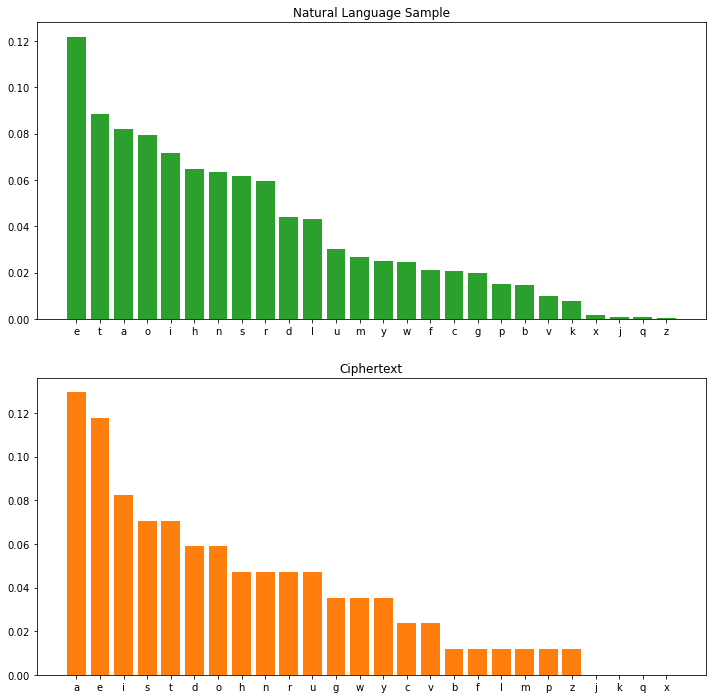

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

ax1.bar(
    list(map(lambda x: x[0] ,naturalLanguageFrequenciesSorted)),
    list(map(lambda x: x[1] ,naturalLanguageFrequenciesSorted)),
    color="tab:green"
)
ax1.set(title="Natural Language Sample")
ax2.bar(
    list(map(lambda x: x[0] ,frequencyTables[5])),
    list(map(lambda x: x[1] ,frequencyTables[5])),
    color="tab:orange"
)
ax2.set(title="Ciphertext")
plt.show()

In [25]:
def decryptVigenere(cipher: str, key: list[int], alphabet: list[str]):
    ciphertext = cm.lclear(cipher)
    plaintext = ""
    for count, char in enumerate(ciphertext):
        position = alphabet.index(char)
        currentPositionInKey = count % len(key)
        newChar = alphabet[(position - key[currentPositionInKey]) % len(alphabet)]
        plaintext += newChar
    return plaintext

In [26]:
print(decryptVigenere(ciphertext3, [4, 9, 19, 6, 11, 0], englishAlphabet))

orrevporptjmemctieqypiotlmitmevmalbgesucpzywerjngwihfrepxvfdaxtdeybiproamiseewavseewavswbsarjnvsueatfddcqebrgmutfdwmihuheeqimitciouhirzlfarrpnefeiaenotmdntliotaiumecbfinkweiadehpfcieaiotevtsuingddfsarscsypxdgsaplnsqenhxnhcoyctmeswwovrsimpmormcguhejpsdineiiogwsgleofwtcsetqtstagihooedeneewavssuumfaeeupscaoangxeotbsdkpncvnpuaneaytismctievmalbgepxbsarcihfboszwbsfmalfdwmihnysxtrjouwroeesecddipltrtanhihftehsyceavuemtawjdeenyggftoycrbvepihfseggeushmsdfnwmihjnhiqosroatduhefdolanhqehanxdsuudcxtxitluesveridfdigptjon


In [27]:
print(decryptVigenere(ciphertext3, [4, 9, 19, 6, 12, 0], englishAlphabet))

orreuporptimemctheqypintlmitlevmalagesucozyweringwiherepxvedaxtddybiprnamisedwavsedwavswasarjnusueateddcqeargmutedwmihtheeqilitciothirzlearrpndfeiaemotmdnsliotahumecbeinkwehadehpecieaintevtstingddesarscrypxdgraplnspenhxngcoyctleswwoursimplormcgthejpscineiingwsgldofwtcretqtssagihonedenedwavsstumfaedupscanangxentbsdkoncvnptaneaysismcthevmalagepxbrarciheboszwasfmaledwmihmysxtriouwrodesecdcipltrsanhihetehsybeavueltawjddenyggetoycravepiheseggetshmsdenwmihinhiqorroatdthefdokanhqeganxdstudcxtwitluerveridedigption


In [28]:
decryptVigenere(ciphertext3, [4, 13, 8, 6, 12, 0], englishAlphabet)

'onceuponatimeinthequaintlittlevillageofcozyspringstherelivedateddybearnamededwardedwardwasanunusualteddybeargiftedwiththeabilitytothinklearnandfeelemotionslikeahumanbeinghehadaspecialinterestincodesandcryptographyspendingcountlesshoursexploringthefascinatingworldofsecretmessagesonedayedwardstumbleduponanancientbookoncryptanalysisinthevillagelibrarythebookwasfilledwithmysteriouscodesandciphersandtheteddybearfeltasuddenurgetounravelthesecretshiddenwithinheborrowedthebookandbegantostudyitwithferventdedication'

In [37]:
print(f"Code word is : {''.join(englishAlphabet[i] for i in [4, 13, 8, 6, 12, 0])}")

Code word is : enigma


----------------------